In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import glob
import shutil

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_train=pathlib.Path('C:/Users/Admin/Downloads/CNN_assignment/Train')
data_test=pathlib.Path('C:/Users/Admin/Downloads/CNN_assignment/Test')

In [3]:
# image count of train and test data

img_count_train=len(list(data_train.glob('*/*.jpg')))
print(img_count_train)
img_count_test=len(list(data_test.glob('*/*.jpg')))
print(img_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
# Writing train dataset 
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset

train_data=tf.keras.preprocessing.image_dataset_from_directory(data_train,seed=123,validation_split=0.2,subset='training',image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Writing validation dataset 
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset

val_data=tf.keras.preprocessing.image_dataset_from_directory(data_train,seed=123,validation_split=0.2,subset='validation', image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# Listing out all the classes of skin cancer and storing them in a list.

class_names=train_data.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [8]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [9]:
for images,labels in train_data.take(1):
  print(len(images))
  print(len(labels))

32
32


## Visualize the data

32
32


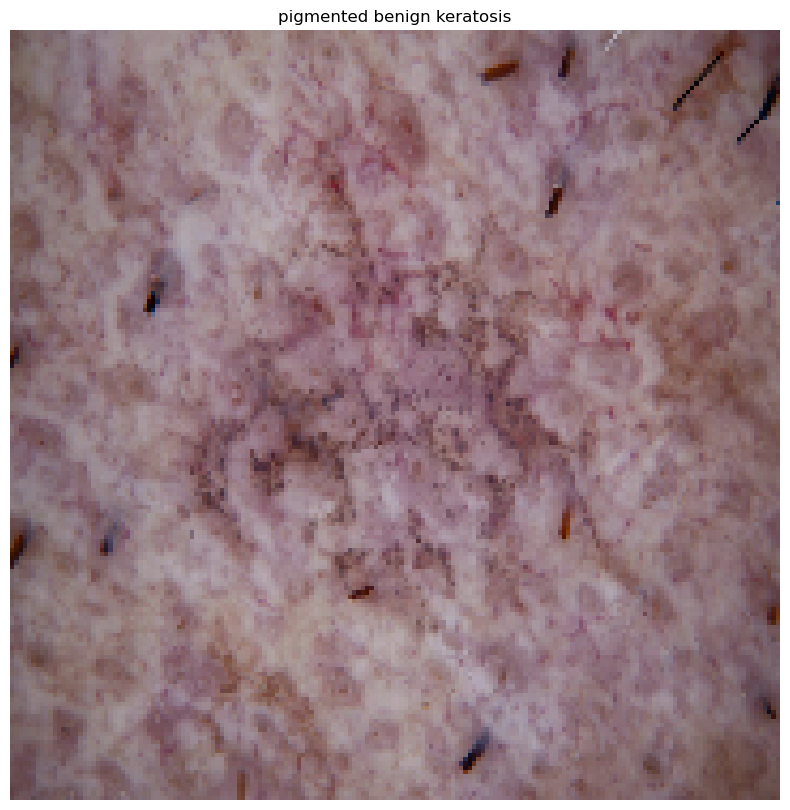

In [10]:
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  print(len(images))
  print(len(labels))
  plt.imshow(images[10].numpy().astype("uint8"))
  plt.title(class_names[labels[10]])
  plt.axis("off")

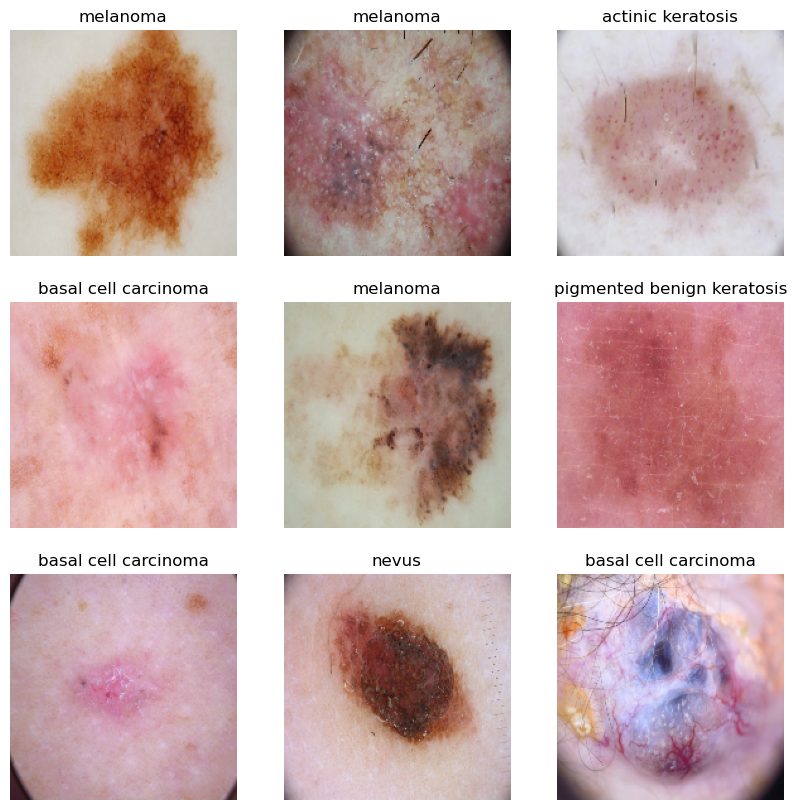

In [11]:
plt.figure(figsize=(10,10))
for images,labels in train_data.take(5):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
print(type(train_data))
print(len(train_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
56


In [13]:
# overlaps data preprocessing and model execution while training.,Speeding up training

AUTOTUNE=tf.data.experimental.AUTOTUNE
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data=val_data.cache().prefetch(buffer_size=AUTOTUNE)

## creating model

In [14]:
num_classes=9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
#2D convolution layer (e.g. spatial convolution over images).We slide over the feature map and extract tiles of a specified size.
# Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
#Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting. Flattens all its structure to create a single long feature vector

model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),layers.MaxPooling2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),layers.MaxPooling2D(),layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),layers.Flatten(),layers.Dense(128,activation='relu'),layers.Dense(num_classes)])

In [15]:
# View the summary of all layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
# choosing an appropirate optimiser and loss function
# RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
# Adam is a recently proposed update that looks a bit like RMSProp with momentum. 

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [17]:
epochs=20
history=model.fit(train_data,validation_data=val_data,epochs=epochs)

Epoch 1/20


56/56 [==============================] - 69s 568ms/step - loss: 1.9697 - accuracy: 0.2483 - val_loss: 1.9258 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 22s 392ms/step - loss: 1.7245 - accuracy: 0.3823 - val_loss: 1.6224 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 22s 392ms/step - loss: 1.5160 - accuracy: 0.4688 - val_loss: 1.4995 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 22s 397ms/step - loss: 1.3399 - accuracy: 0.5312 - val_loss: 1.4035 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 22s 388ms/step - loss: 1.3077 - accuracy: 0.5435 - val_loss: 1.3219 - val_accuracy: 0.5615
Epoch 6/20
56/56 [==============================] - 22s 388ms/step - loss: 1.1782 - accuracy: 0.5809 - val_loss: 1.3758 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 22s 386ms/step - loss: 1.1055 - accuracy: 0.6088 - val_loss: 1.4743 - val_accuracy: 0.49

# Training the model

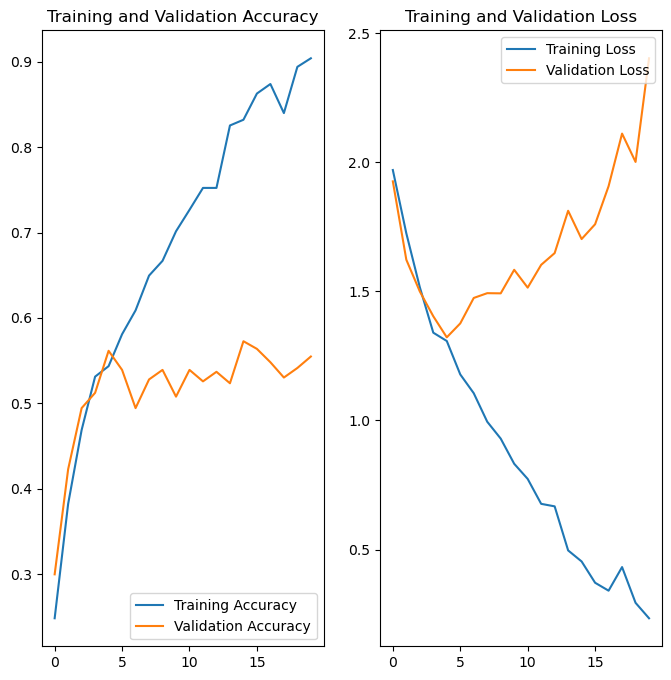

In [18]:
accu=history.history['accuracy']
val_accu=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range,accu,label='Training Accuracy')
plt.plot(epochs_range,val_accu,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
loss,accu=model.evaluate(train_data,verbose=1,)
val_loss,val_accu=model.evaluate(val_data,verbose=1)

print("Accuracy:",accu)
print("Validation Accuracy:",val_accu)
print("Loss:",loss)
print("Validation Loss",val_loss)

14/14 [==============================] - 1s 89ms/step - loss: 2.4023 - accuracy: 0.5548
Accuracy: 0.9386160969734192
Validation Accuracy: 0.5548098683357239
Loss: 0.16482357680797577
Validation Loss 2.4023373126983643


In [20]:
# again modelling

model=Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),layers.MaxPooling2D(),layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),layers.Conv2D(64,3,padding='same',activation='relu'),layers.MaxPooling2D(),
                  layers.Flatten(),layers.Dense(128, activation='relu'),  layers.Dense(num_classes)])

## visualizing training data

In [21]:
# after analyseing the model fit history for presence of underfit or overfit, choosing an appropriate data augumentation strategy.

data_augmentation=keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),])

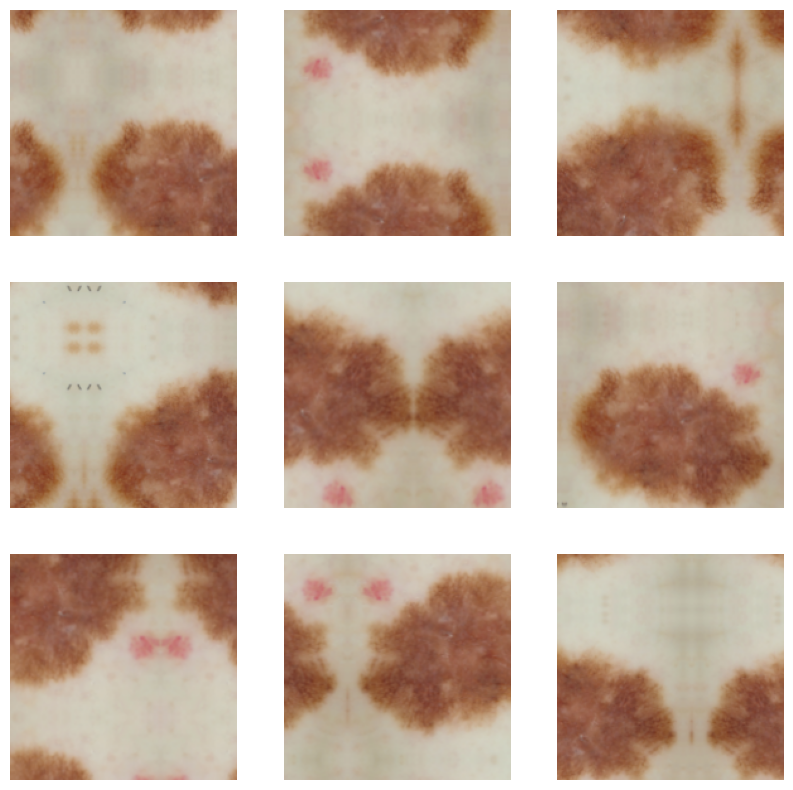

In [22]:
plt.figure(figsize=(10,10))
for images,_ in train_data.take(1):
  for i in range(9):
    augmented_images=data_augmentation(images)
    ax=plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### create the model compile and train the model

In [23]:
model=Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255),layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),layers.Conv2D(128,3,padding='same', activation='relu'),layers.MaxPooling2D(),
                  layers.Conv2D(256,3,padding='same',activation='relu'),layers.MaxPooling2D(),layers.Dropout(0.2),
                  layers.Flatten(),layers.Dense(128,activation='relu'),layers.Dense(num_classes)])

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:
epochs=20
history=model.fit(train_data,validation_data=val_data,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 297s 5s/step - loss: 2.4504 - accuracy: 0.2093 - val_loss: 2.0768 - val_accuracy: 0.2081
Epoch 2/20
56/56 [==============================] - 290s 5s/step - loss: 2.0135 - accuracy: 0.2204 - val_loss: 1.9607 - val_accuracy: 0.2528
Epoch 3/20
56/56 [==============================] - 481s 9s/step - loss: 2.0373 - accuracy: 0.2344 - val_loss: 2.0235 - val_accuracy: 0.2506
Epoch 4/20
56/56 [==============================] - 293s 5s/step - loss: 1.8717 - accuracy: 0.2963 - val_loss: 1.8336 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 293s 5s/step - loss: 1.6946 - accuracy: 0.3426 - val_loss: 1.6596 - val_accuracy: 0.3311
Epoch 6/20
56/56 [==============================] - 910s 16s/step - loss: 1.7500 - accuracy: 0.3438 - val_loss: 1.7002 - val_accuracy: 0.3624
Epoch 7/20
56/56 [==============================] - 293s 5s/step - loss: 1.6737 - accuracy: 0.3605 - val_loss: 1.6362 - val_accuracy: 0.3803
Epoch 8/20
5

## visualizing the results

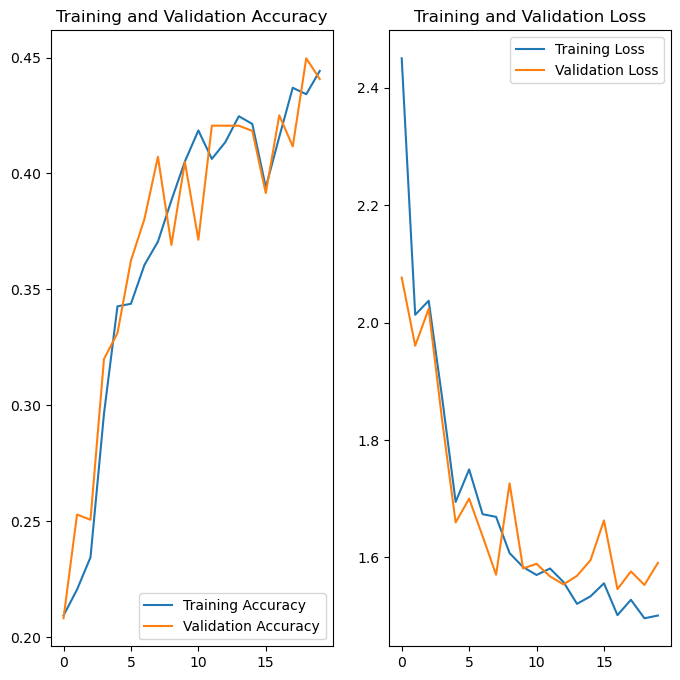

In [26]:
accu=history.history['accuracy']
val_accu=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range,accu,label='Training Accuracy')
plt.plot(epochs_range,val_accu,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
loss,accu=model.evaluate(train_data,verbose=1,)
val_loss,val_accu=model.evaluate(val_data,verbose=1)

print("Accuracy:",accu)
print("Validation Accuracy:",val_accu)
print("Loss:",loss)
print("Validation Loss",val_loss)

14/14 [==============================] - 11s 799ms/step - loss: 1.5908 - accuracy: 0.4407
Accuracy: 0.4693080484867096
Validation Accuracy: 0.44071587920188904
Loss: 1.4380239248275757
Validation Loss 1.590839147567749


In [28]:
# For convenience, let us set up the path for the training and validation sets

train_dir=os.path.join('C:/Users/Admin/Downloads/CNN_assignment/Train')
val_dir=os.path.join('C:/Users/Admin/Downloads/CNN_assignment/Test')

In [29]:
# Setting batch size and image size

batch_size=100
IMG_SHAPE=224

# Create training images generator
# Generate batches of tensor image data with real-time data augmentation.

image_gen_train=ImageDataGenerator(rescale=1./255,rotation_range=45,width_shift_range=.15,height_shift_range=.15,
                                   horizontal_flip=True,zoom_range=0.5)

#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories

train_data_gen=image_gen_train.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='sparse')

# Creating validation images generator

image_gen_val=ImageDataGenerator(rescale=1./255)
val_data_gen=image_gen_val.flow_from_directory(batch_size=batch_size,directory=val_dir,target_size=(IMG_SHAPE, IMG_SHAPE),
                                               class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [30]:
# Create a CNN model
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor

model = Sequential()

#2D convolution layer (e.g. spatial convolution over images).

model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,3,padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(9))

In [31]:
# Compile the model

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [32]:
# Train the model

epochs = 20
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=10)

Epoch 1/10
23/23 [==============================] - 141s 6s/step - loss: 2.6577 - accuracy: 0.2099 - val_loss: 2.2391 - val_accuracy: 0.1356
Epoch 2/10
23/23 [==============================] - 121s 5s/step - loss: 1.7475 - accuracy: 0.3828 - val_loss: 2.3181 - val_accuracy: 0.2458
Epoch 3/10
23/23 [==============================] - 119s 5s/step - loss: 1.6066 - accuracy: 0.4288 - val_loss: 2.0906 - val_accuracy: 0.2627
Epoch 4/10
23/23 [==============================] - 119s 5s/step - loss: 1.5679 - accuracy: 0.4457 - val_loss: 2.2038 - val_accuracy: 0.3051
Epoch 5/10
23/23 [==============================] - 121s 5s/step - loss: 1.4481 - accuracy: 0.4882 - val_loss: 2.5545 - val_accuracy: 0.3559
Epoch 6/10
23/23 [==============================] - 120s 5s/step - loss: 1.4079 - accuracy: 0.5154 - val_loss: 2.3182 - val_accuracy: 0.3305
Epoch 7/10
23/23 [==============================] - 120s 5s/step - loss: 1.3517 - accuracy: 0.5150 - val_loss: 2.1393 - val_accuracy: 0.3644
Epoch 8/10
23

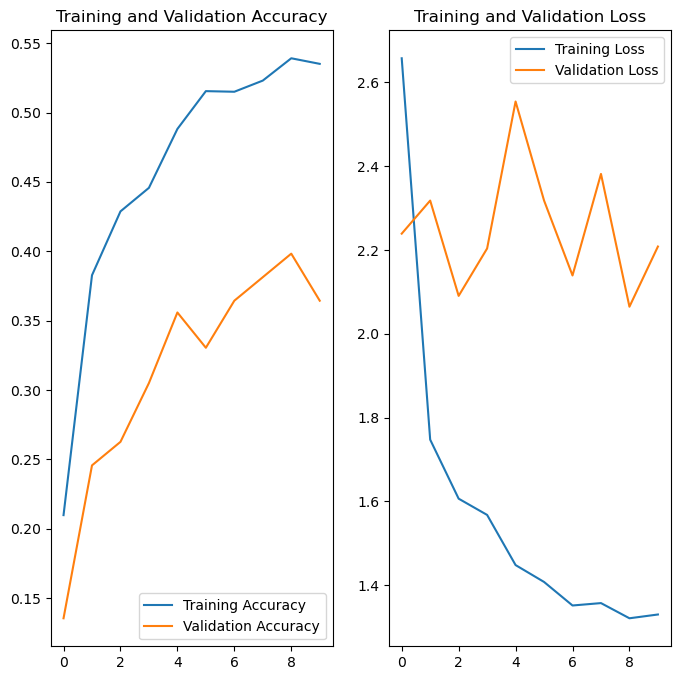

In [33]:
#visualizing the data

epochs=10
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
# comparing with previous model

from glob import glob

path_list=[x for x in glob(os.path.join(data_train,'*','*.jpg'))]
lesion_list=[os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_train,'*','*.jpg'))]
len(path_list)

2239

In [35]:
dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,C:\Users\Admin\Downloads\CNN_assignment\Train\...,actinic keratosis
1,C:\Users\Admin\Downloads\CNN_assignment\Train\...,actinic keratosis
2,C:\Users\Admin\Downloads\CNN_assignment\Train\...,actinic keratosis
3,C:\Users\Admin\Downloads\CNN_assignment\Train\...,actinic keratosis
4,C:\Users\Admin\Downloads\CNN_assignment\Train\...,actinic keratosis
...,...,...
2234,C:\Users\Admin\Downloads\CNN_assignment\Train\...,vascular lesion
2235,C:\Users\Admin\Downloads\CNN_assignment\Train\...,vascular lesion
2236,C:\Users\Admin\Downloads\CNN_assignment\Train\...,vascular lesion
2237,C:\Users\Admin\Downloads\CNN_assignment\Train\...,vascular lesion


Class=0,n=114(5.092%)
Class=1,n=376(16.793%)
Class=2,n=95(4.243%)
Class=3,n=438(19.562%)
Class=4,n=357(15.945%)
Class=5,n=462(20.634%)
Class=6,n=77(3.439%)
Class=7,n=181(8.084%)
Class=8,n=139(6.208%)


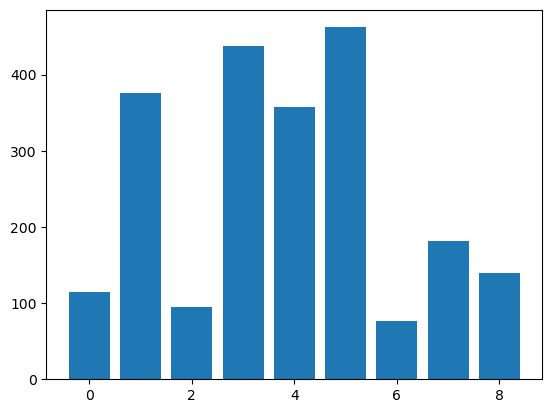

In [36]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# split into input and output elements

X,y=original_df['Path'],original_df['Label']

y=LabelEncoder().fit_transform(y)

counter=Counter(y)
for k,v in counter.items():
    per=v/len(y)*100
    print('Class=%d,n=%d(%.3f%%)'%(k,v,per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [37]:
datapath='C:/Users/Admin/Downloads/CNN_assignment/Train/actinic keratosis'

import Augmentor

p=Augmentor.Pipeline(datapath)

p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
p.zoom(probability=0.5,min_factor=1.1,max_factor=1.5)
p.sample(150)
p.process()

Initialised with 114 image(s) found.
Output directory set to C:/Users/Admin/Downloads/CNN_assignment/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x237EBE0DA10>: 100%|██████████| 150/150 [00:04<00:00, 31.05 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x237EBE0D510>: 100%|██████████| 114/114 [00:03<00:00, 31.47 Samples/s]                  


In [38]:
image_count_train=len(list(data_train.glob('*/output/*.jpg')))
print(image_count_train)

264


In [39]:
path_list_new=[x for x in glob(os.path.join(data_train,'*','output','*.jpg'))]
path_list_new

['C:\\Users\\Admin\\Downloads\\CNN_assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_576e41fa-c450-44f1-a331-807a0936085c.jpg',
 'C:\\Users\\Admin\\Downloads\\CNN_assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_30af1c90-0de9-4a7b-912a-132614233eda.jpg',
 'C:\\Users\\Admin\\Downloads\\CNN_assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_cf378456-9b6e-4867-914e-d3cae364a4bb.jpg',
 'C:\\Users\\Admin\\Downloads\\CNN_assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_d7ed05bd-1837-4c6a-a2fa-573e70eac4e1.jpg',
 'C:\\Users\\Admin\\Downloads\\CNN_assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_2a4530bd-6cc2-4270-8ee1-6df9c957e26d.jpg',
 'C:\\Users\\Admin\\Downloads\\CNN_assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_ee734eff-1d90-4fb1-9183-42680fdbc11

In [40]:
lesion_list_new=[os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_train,'*','output','*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [41]:
dataframe_dict_new=dict(zip(path_list_new,lesion_list_new))

In [42]:
df2=pd.DataFrame(list(dataframe_dict_new.items()),columns=['Path','Label'])
new_df=original_df.append(df2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9684\2027809093.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=original_df.append(df2)


In [43]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
actinic keratosis             378
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

## Train the model on the data 

In [44]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_train,seed=123,validation_split=0.2,subset='training',
                                                             image_size=(img_height,img_width),batch_size=batch_size)

Found 2503 files belonging to 9 classes.
Using 2003 files for training.


In [45]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_train,seed=123,validation_split=0.2,subset='validation',
                                                           image_size=(img_height,img_width),batch_size=batch_size)

Found 2503 files belonging to 9 classes.
Using 500 files for validation.


## creating model

In [46]:
AUTOTUNE=tf.data.experimental.AUTOTUNE

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model=Sequential([layers.experimental.preprocessing.Rescaling(1./255),layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),layers.Conv2D(32,3,padding='same',activation='relu'),layers.MaxPooling2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),layers.MaxPooling2D(),layers.Dropout(0.2),
                  layers.Flatten(),layers.Dense(128, activation='relu'),layers.Dense(num_classes)])

In [47]:
#compile model

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [48]:
# training the model

epochs=20
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
21/21 [==============================] - 39s 1s/step - loss: 2.1211 - accuracy: 0.2371 - val_loss: 1.8880 - val_accuracy: 0.3040
Epoch 2/20
21/21 [==============================] - 21s 972ms/step - loss: 1.7918 - accuracy: 0.3440 - val_loss: 1.6906 - val_accuracy: 0.3520
Epoch 3/20
21/21 [==============================] - 20s 1s/step - loss: 1.7245 - accuracy: 0.3560 - val_loss: 1.5942 - val_accuracy: 0.3940
Epoch 4/20
21/21 [==============================] - 21s 996ms/step - loss: 1.6028 - accuracy: 0.4329 - val_loss: 1.5514 - val_accuracy: 0.4080
Epoch 5/20
21/21 [==============================] - 21s 982ms/step - loss: 1.4942 - accuracy: 0.4658 - val_loss: 1.4517 - val_accuracy: 0.4900
Epoch 6/20
21/21 [==============================] - 21s 978ms/step - loss: 1.3899 - accuracy: 0.5222 - val_loss: 1.3805 - val_accuracy: 0.5440
Epoch 7/20
21/21 [==============================] - 20s 967ms/step - loss: 1.3184 - accuracy: 0.5457 - val_loss: 1.3658 - val_accuracy: 0.5300
Epoch

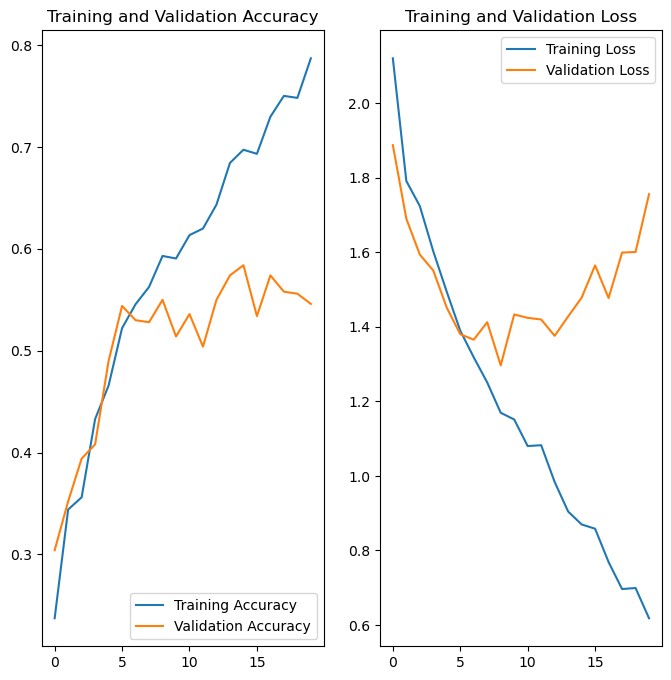

In [49]:
# visualing the data

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Accuracy has been increased on train data by using Augmentor library